<a href="https://colab.research.google.com/github/Toxoczy/Mini-dhanush/blob/main/Copy_of_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To extract the data from computer**

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Cardiovascular_Disease_Dataset.csv')
print(df.head(5))

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None


In [ ]:
df=df.dropna()

 To assign dependent(x) and independent(y) values

In [ ]:
X=df.drop('target',axis=1)
Y=df['target']

To enture the data is separated

In [ ]:
print(X)
print(Y)

     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1           147              0      5.3 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=48)

To convert datatype into float

In [ ]:
X_train= X_train.astype(float)
X_test= X_test.astype(float)
Y_train= Y_train.astype(float)
Y_test= Y_test.astype(float)

READ DATASET AND PREPROCESS THE DATA

IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Total missing percent of data

In [ ]:
missing_data= df.isnull().sum()
total_percentage= (missing_data.sum()/df.shape[0]) * 200
print(f"Total percentage of missing data is {round(total_percentage,2)}%")
duplicate=df[df.duplicated()]
print("duplicate rows:")
duplicate
df=df.drop_duplicates()

Total percentage of missing data is 0.0%
duplicate rows:


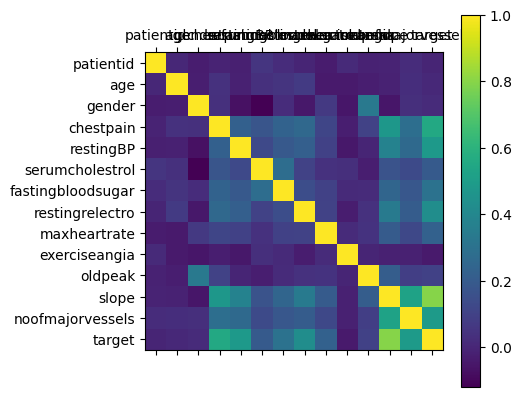

In [ ]:
rcParams['figure.figsize'] *10,20
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
patientid,1.000000,0.004978,-0.031263,-0.009679,-0.020926,0.053464,0.022331,-0.003667,-0.036486,0.014338,-0.013825,-0.010128,0.019465,-0.005637
age,0.004978,1.000000,-0.024717,0.037731,-0.016126,0.035439,0.049732,0.067736,-0.040092,-0.037581,-0.026020,-0.015334,0.025407,0.008356
gender,-0.031263,-0.024717,1.000000,0.035402,-0.069727,-0.120759,0.023560,-0.046634,0.064606,-0.051746,0.331457,-0.051957,0.029376,0.015769
chestpain,-0.009679,0.037731,0.035402,1.000000,0.222267,0.174731,0.232059,0.256316,0.114496,-0.027376,0.101345,0.472731,0.285156,0.554228
restingBP,-0.020926,-0.016126,-0.069727,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194,0.482387
serumcholestrol,0.053464,0.035439,-0.120759,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419,0.195340
fastingbloodsugar,0.022331,0.049732,0.023560,0.232059,0.192063,0.278337,1.000000,0.143982,0.096528,0.011356,0.015311,0.242734,0.182246,0.303233
restingrelectro,-0.003667,0.067736,-0.046634,0.256316,0.219887,0.101767,0.143982,1.000000,0.099991,-0.032489,0.040291,0.343280,0.204684,0.426837
maxheartrate,-0.036486,-0.040092,0.064606,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763,0.228343
exerciseangia,0.014338,-0.037581,-0.051746,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513,-0.039874


Count of each Target class

Text(0.5, 1.0, 'Count of Each Target Class')

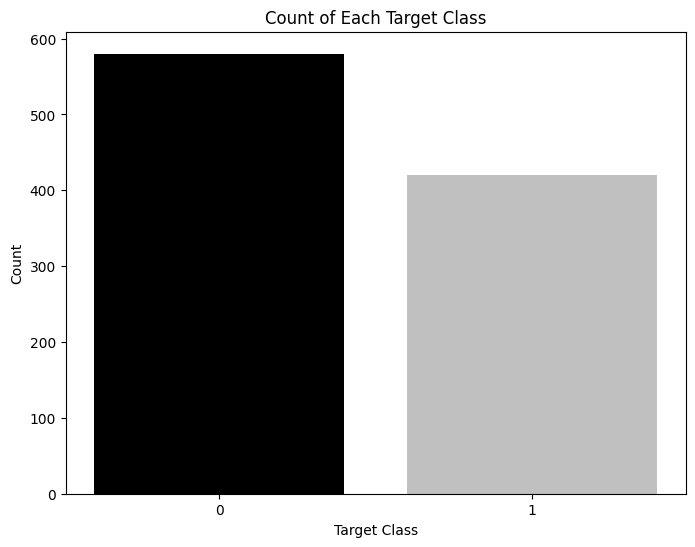

In [ ]:
rcParams['figure.figsize'] = 8,6
unique_targets = np.unique(df['target'])
target_counts = df['target'].value_counts()
plt.bar(unique_targets, target_counts, color=['black', 'silver'])
plt.xticks([0, 1])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Count of Each Target Class')

Divide data into training and testing classes

In [ ]:
X = df.drop(['target'], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print("X_train->",X_train.shape[0],"XTest->",X_test.shape[0])
print("y_train->",y_train.shape[0],"yTest->",y_test.shape[0])

X_train-> 700 XTest-> 300
y_train-> 700 yTest-> 300


MODEL BUILDING

KNN algorithm

In [ ]:
knn_scores = []
for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train.values, y_train.values)
    knn_score=round(knn_classifier.score(X_test.values, y_test.values),2)
    knn_scores.append(knn_score)
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
knn_score=knn_classifier.predict(X_test)
print(classification_report(y_test,knn_score))

              precision    recall  f1-score   support

           0       0.44      0.31      0.36       139
           1       0.52      0.66      0.58       161

    accuracy                           0.50       300
   macro avg       0.48      0.48      0.47       300
weighted avg       0.48      0.50      0.48       300



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

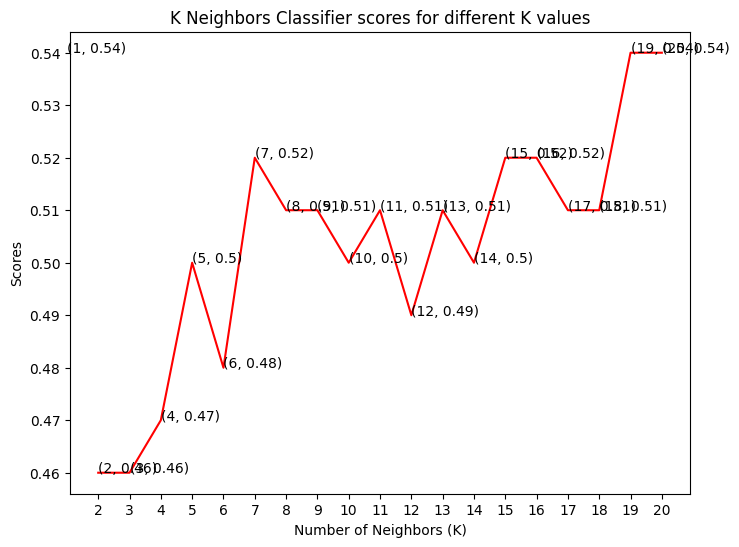

In [ ]:
plt.plot([k for k in range(2, 21)], knn_scores, color = 'red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-2], (i, knn_scores[i-2]))
plt.xticks([i for i in range(2, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

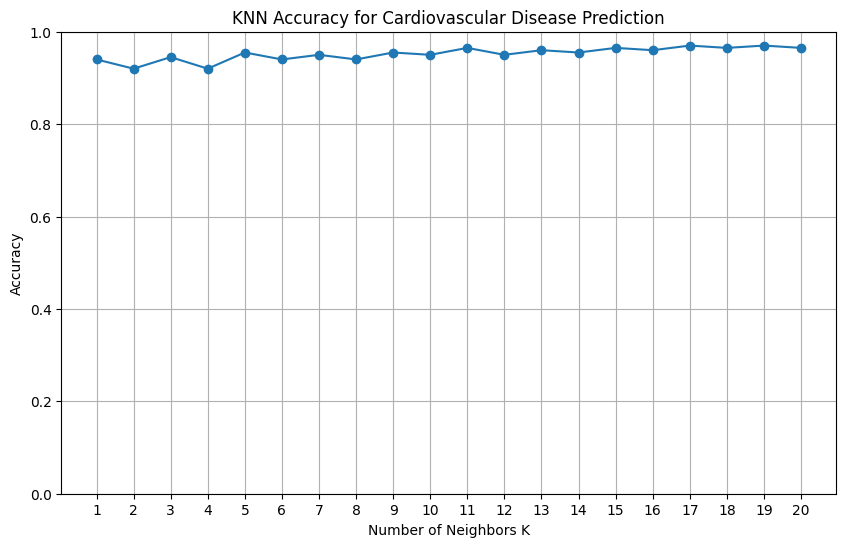

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
X = df.drop('target', axis=1)  # Features
y = df['target']                # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
accuracy_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy for Cardiovascular Disease Prediction')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.ylim([0, 1])
plt.show()

Support vector machine algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [6, 7, 8, 9, 10],
        'target': [0, 1, 0, 1, 0]}
df = pd.DataFrame(data)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range (len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train.values, y_train.values)
    svc_scores.append(round(svc_classifier.score(X_test.values, y_test.values),2))
svc_classifier = SVC(kernel = kernels[0])
svc_classifier.fit(X_train.values, y_train.values)
svc_prediction_result=svc_classifier.predict(X_test.values)
print(accuracy_score(y_test.values,svc_prediction_result))

0.0


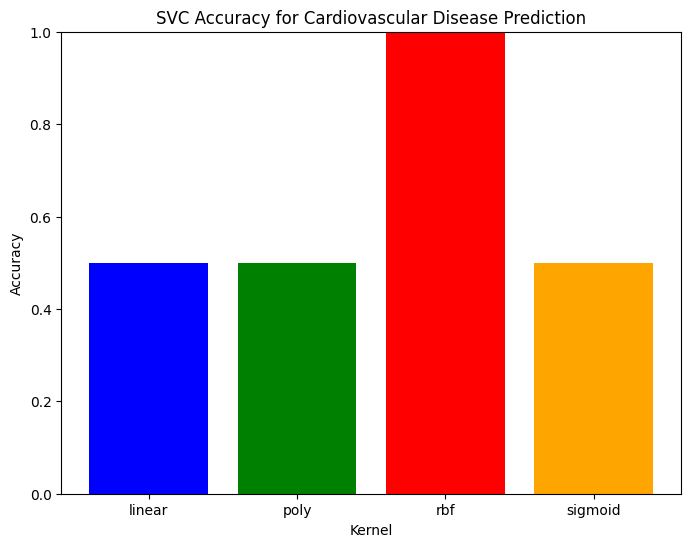

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [0, 1, 0, 1, 0, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc_scores = []
for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train, y_train)
    y_pred = svc_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svc_scores.append(accuracy)
plt.bar(kernels, svc_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVC Accuracy for Cardiovascular Disease Prediction')
plt.ylim([0, 1])
plt.show()

Decision tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [0, 1, 0, 1, 0, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X to a Pandas DataFrame
X = pd.DataFrame(X)

df_scores = []
for i in range(1, len(X.columns) + 1):
  df_classifier = DecisionTreeClassifier(max_features=i, random_state = 0)
  df_classifier.fit(X.values, y)
  df_scores.append(round(df_classifier.score(X_test, y_test),2))
print ("Done")

Done


In [ ]:
print(df_scores)

[1.0, 1.0]


In [ ]:
X = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [0, 1, 0, 1, 0, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
dt_classifier = DecisionTreeClassifier(max_features=13, random_state = 0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_features=13, random_state=0)

Done


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of features')

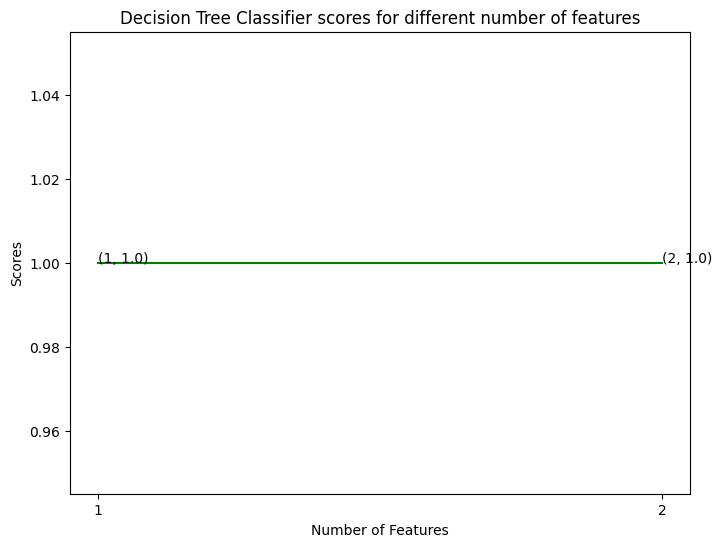

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y = [0, 1, 0, 1, 0, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = pd.DataFrame(X)
df_scores = []
for i in range(1, len(X.columns) + 1):
  df_classifier = DecisionTreeClassifier(max_features=i, random_state = 0)
  df_classifier.fit(X.values, y)
  df_scores.append(round(df_classifier.score(X_test, y_test),2))
print ("Done")
plt.plot([i for i in range(1, len(X.columns) + 1)], df_scores, color = 'green')
for i in range(1, len(X.columns)+1):
  plt.text(i, df_scores[i-1], (i,df_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Number of Features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of features')

Random forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 20, 100, 200, 500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train) # Removed .values attribute from X_train and y_train
    rf_scores.append(round(rf_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

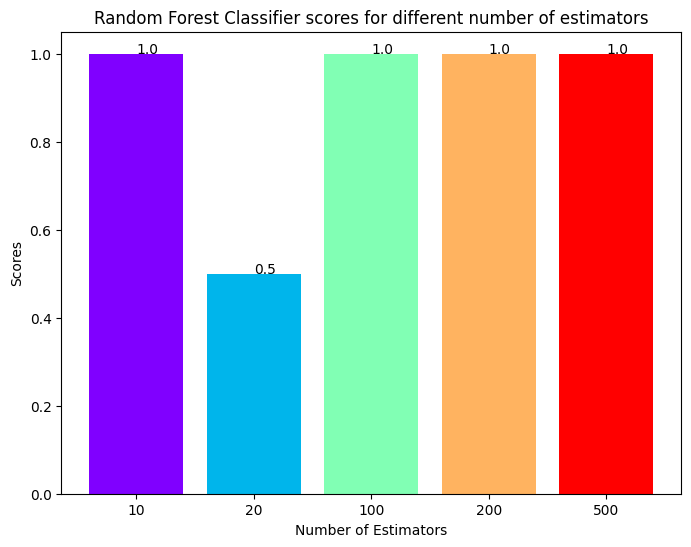

In [ ]:
colors =  rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of Estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

Logistic regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train) # Removed .values attribute from X_train and y_train
logistic_model_prediction= logistic_model.predict(X_test)
print(accuracy_score(y_test, logistic_model_prediction))
print(classification_report(y_test, logistic_model_prediction))

0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [ ]:
import pickle
all_models=[rf_scores,logistic_model,dt_classifier,svc_classifier,knn_classifier]
with open("models.pkl", 'wb') as files:
    pickle.dump(all_models, files)
print("Done")

Done


In [ ]:
open_file = open("models.pkl", "rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[[1.0, 0.5, 1.0, 1.0, 1.0], LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='sigmoid'), KNeighborsClassifier()]
Done
